In [1]:
from helpers import using_preflib
from comchoice.aggregate import divisiveness, win_rate, copeland, borda
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as mtick


In [2]:
def get_data(
    model="IC",
    n_alternatives=7,
    voting="borda",
    step=10
):
    df = pd.read_csv(f"data/experiment_3_method_{model}_profile_100_step_{step}_{voting}.csv")
    df = df[df["n_alternatives"] == n_alternatives]
    df["percentage"] = (df["size"] - 100) / 100

    df1 = df[df["starting_id"] == 2]
    df2 = df[df["starting_id"] == math.ceil(n_alternatives/2)]
    df3 = df[df["starting_id"] == n_alternatives]

    a1 = df1[df1["custom_id"] == 2]
    a2 = df2[df2["custom_id"] == math.ceil(n_alternatives/2)]
    a3 = df3[df3["custom_id"] == n_alternatives]

    df = pd.concat([a1, a2, a3])
    df["model"] = model
    return df

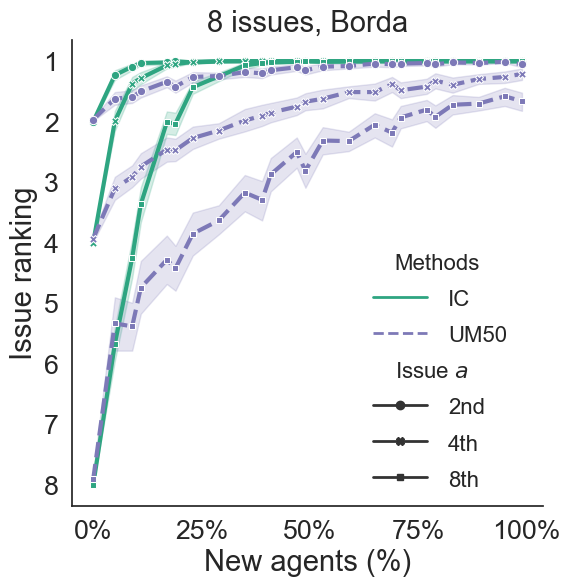

In [3]:
# Parameters to get data stored on data/ folder.

n_alternatives = 8
voting = "borda"
step = 10


df1 = get_data(model="IC", n_alternatives=n_alternatives, voting=voting, step=step)
df2 = get_data(model="UM10", n_alternatives=n_alternatives, voting=voting, step=step)
df3 = get_data(model="UM50", n_alternatives=n_alternatives, voting=voting, step=step)

sns.set(font_scale=1.75, style="white")

data = pd.concat([df1, df3])
n_alternatives = data["n_alternatives"].unique()[0]

g = sns.relplot(
    x="percentage",
    kind="line",
    dashes=False, markers=True,
    y="rank",
    style="custom_id",
    hue="model",
    palette=["#2ea581", "#7d79b7"],
    lw=3,
    data=data,
    height=6,
    # ax=axs
)

ax = g.axes.flatten()[0]
if n_alternatives > 4:
    ax.lines[3].set_linestyle("--")
    ax.lines[4].set_linestyle("--")
    ax.lines[5].set_linestyle("--")
    ax.lines[7].set_linestyle("--")
else:
    ax.lines[2].set_linestyle("--")
    ax.lines[3].set_linestyle("--")
    ax.lines[5].set_linestyle("--")

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax.set_title(f"{n_alternatives} issues, {voting.title()}")
ax.set_xlabel("New agents (%)")
ax.set_ylabel("Issue ranking")

sns.despine()
ax.invert_yaxis()

g._legend.texts[0].set_text("Methods")
g._legend.texts[3].set_text("Issue $a$")
g._legend.texts[4].set_text("2nd")

if n_alternatives > 4:
    g._legend.texts[5].set_text(f"{math.ceil(n_alternatives/2)}th")
    g._legend.texts[6].set_text(f"{n_alternatives}th")
else:
    g._legend.texts[5].set_text(f"{n_alternatives}th")

leg = g._legend
leg.set_bbox_to_anchor([0.45, 0.6])
leg._loc = 2
plt.setp(leg.get_texts(), fontsize=16)
leg.get_lines()[2].set_linestyle("--")
for line in leg.get_lines():
    line.set_linewidth(2.0)

sns.despine()

plt.show()